In [1]:
import sys, os, re, jax
sys.path.append(os.path.abspath("./../../feedback-grape"))
sys.path.append(os.path.abspath("./../../"))
sys.path.append(os.path.abspath("./../"))

from matplotlib import pyplot as plt
import numpy as np

from plot_helpers import (
    open_from_dir,
    plot_runs,
    plot_runs_1D,
    plot_grid,
    grid_grouped_params,
    select_best_runs,
    extract_time_constants,
)

In [2]:
dir_ = "./10_results"

# gamma values to choose from:
#       0.0001, 0.0001873817422860383, 0.0003511191734215131, 0.0006579332246575682, 0.0012328467394420659, 0.002310129700083158
#       0.004328761281083057, 0.008111308307896872, 0.01519911082952933, 0.02848035868435799, 0.05336699231206307, 0.1
#gamma_p, gamma_m = 0.0003511191734215131, 0.02848035868435799 # Only system where oscillations are the best performing model and slightly better than stabilizer

# Here some cases from "./04_results"
# Cases, where all models are clearly better than stabilizer
#gamma_p, gamma_m = 0.0001, 0.1
#gamma_p, gamma_m = 0.0001873817422860383, 0.1
#gamma_p, gamma_m = 0.0003511191734215131, 0.1
#gamma_p, gamma_m = 0.0006579332246575682, 0.1

# In this case, some models are clearly better, some equal to stabilizer and one shows oscillations
gamma_p, gamma_m = 0.0001, 0.05336699231206307
#gamma_p, gamma_m = 0.0001873817422860383, 0.05336699231206307

# Some better some worse than stabilizer, but no oscillations
#gamma_p, gamma_m = 0.05336699231206307, 0.0003511191734215131
#gamma_p, gamma_m = 0.0012328467394420659, 0.1
#gamma_p, gamma_m = 0.002310129700083158, 0.1

# Incidence, where all curves perform similar, but stabilizer is worse than baseline! (probably due to stochasticity, causing baseline to be very slightly above 50%)
#gamma_p, gamma_m = 0.1, 0.0003511191734215131
#gamma_p, gamma_m = 0.1, 0.0001
#gamma_p, gamma_m = 0.1, 0.0001873817422860383


# Here some cases from "./05_results"
gamma_p, gamma_m = 0.002310129700083158, 0.05336699231206307

exclude = rf"^(?!.*gammap={gamma_p}_gammam={gamma_m}).*$"

fidelities_mat, params_grouped, params_each = open_from_dir(dir_ + "/eval", exclude=exclude)
fidelities_best_mat, params_grouped_best, params_each_best = select_best_runs(fidelities_mat, params_each)

print(f"Chosen as best model parameters: s={params_grouped_best['s'][0]}")
fidelities_mat_stab, params_grouped_stab, params_each_stab = open_from_dir(dir_ + "/custom/Stabilizer code", exclude=exclude)
fidelities_mat_base, params_grouped_base, params_each_base = open_from_dir(dir_ + "/baseline", exclude=exclude)

Opening files...


100%|██████████| 720/720 [00:00<00:00, 93094.70it/s]


Done.
Chosen as best model parameters: s=1
Opening files...


100%|██████████| 173/173 [00:00<00:00, 153504.25it/s]


Done.
Opening files...


100%|██████████| 144/144 [00:00<00:00, 41428.07it/s]

Done.


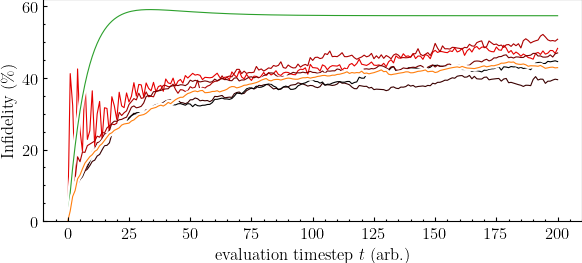

In [5]:
from os import path
from matplotlib.patheffects import Normal, SimpleLineShadow

white_outline = [SimpleLineShadow(shadow_color="white", linewidth=4, alpha=1, offset=(0,0)), Normal()] # White outline for better visibility

fig, ax = plt.subplots(figsize=(6.1811,3))
ax.set_xlabel("$\\textrm{evaluation timestep }t\\textrm{ (arb.)}$")
ax.set_ylabel("$\\textrm{Infidelity (\\%)}$")

ax.plot((1 - fidelities_mat_base[0])*100, label="$\\textrm{baseline}$", color="C2", zorder=1, path_effects=white_outline)
ax.plot((1 - fidelities_mat_stab[0])*100, label="$\\textrm{stabilizer code}$", color="C1", zorder=1, path_effects=white_outline)

for i, (fidelities, p) in enumerate(zip(fidelities_mat, params_each)):
    red = 0. + 0.9 * (p['s'] / max(params_grouped['s']))
    ax.plot((1 - fidelities)*100, label=f"$\\textrm{{model }} s={p['s']}$", color = (red, 0, 0), zorder=0)

"""
for mat, name in zip(
    [fidelities_mat, fidelities_mat_stab, fidelities_mat_base],
    ["models", "stabilizer code", "baseline"]
):
    exp_fits = extract_time_constants(mat)
    print(f"Time constants extracted for {name}: {exp_fits[1]}. Error {exp_fits[3]}")

    def exp_decay(t, a, tau):
        return a * np.exp(-t / tau) + (1 - a)
    t_data = np.arange(mat.shape[1])

    for a,tau in zip(exp_fits[0], exp_fits[1]):
        ax.plot(t_data, exp_decay(t_data, a, tau), color="gray", alpha=0.7, ls="--")
"""
ax.set_ylim(ymin=0)
#ax.legend(loc="lower right", ncol=3)
plt.tight_layout()
fig.savefig(f"{dir_}/specific_system_gamma_p={gamma_p}_gamma_m={gamma_m}.svg")

In [4]:
exp_fits = extract_time_constants(fidelities_mat)
print("Time constants extracted for each model: ", exp_fits[1], ". Their errors ", exp_fits[3])
exp_fits = extract_time_constants(fidelities_mat_stab)
print("Time constant for stabilizer code: ", exp_fits[1], ". Their errors ", exp_fits[3])
exp_fits = extract_time_constants(fidelities_mat_base)
print("Time constant for baseline ", exp_fits[1], ". Their errors ", exp_fits[3])

Time constants extracted for each model:  [19.40052798 24.97841619 11.52661015 24.08532314 20.24212725] . Their errors  [0.33035016 0.73187124 0.88725554 0.75847012 0.40777467]
Time constant for stabilizer code:  [23.40859456] . Their errors  [0.48055707]
Time constant for baseline  [6.19112997] . Their errors  [0.06182139]
